# Importing necessary packages

## General packages

In [1]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time

## Electra classifier

In [2]:
print("Preparing Electra Classifier...")
from electra_classifier import *

best_model_path = "electra_cls/lightning_logs/version_18/checkpoints/epoch=9-step=3629.ckpt"
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']

MODEL_NAME = "google/electra-base-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(MODEL_NAME)

trained_model = EmotionClassifier.load_from_checkpoint(
    # trainer.checkpoint_callback.best_model_path,
    best_model_path,
    n_classes=len(emotion_categories)
)

def predict_emotion_and_probability(text):
    encoding = tokenizer(
          text,
          max_length=64, 
          truncation=True,
          padding="max_length",
          add_special_tokens=True,
          return_token_type_ids=False,
          return_attention_mask=True,
          return_tensors="pt"
      )
    outputs = trained_model(**encoding)
    probabilities = list(torch.softmax(outputs, dim=-1).detach().numpy().flatten())
    emotion_idx = torch.argmax(outputs, dim=-1).item() 
    predicted_emotion = emotion_categories[emotion_idx]

    emotion_categories_list = list(emotion_categories)
    probabilities, emotion_categories_list = zip(*sorted(zip(probabilities, emotion_categories_list)))
    probabilities = probabilities[::-1]
    emotion_categories_list = emotion_categories_list[::-1]
    emotion_probability = round(100*probabilities[0], 2)#:.2f

    return predicted_emotion, emotion_probability

print("Electra Classifier is ready!")

Preparing Electra Classifier...


Global seed set to 42
Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraClassifier: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraClassifier were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias',

Electra Classifier is ready!


In [3]:
sample_text = "I do! I was so happy when I opened the box and that fat mofo jumped out!"
predict_emotion_and_probability(sample_text)

('joy', 98.35)

# Importing data

## The first 10% of the data

In [4]:
#chatept_output_10 = pd.read_pickle("ChatEPT/prompt2/first_10_percent_grouped_by_df_prompt2")
chatept_output_10 = pd.read_pickle("ChatEPT/prompt2/first_10_percent_grouped_by_df_prompt2")
chatept_output_10 = chatept_output_10.drop('utterance_2_emotion', axis=1)
chatept_output_10.head()

,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_response_prompt2
0,hit:0_conv:1,sentimental,[I remember going to see the fireworks with my...,neutral,99.86,I'm sorry to hear that. Maybe someday you'll r...,I can imagine that losing a close friend can b...
1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great! Toads can make wonderful pets an...,"As an AI language model, I don't have feelings..."
2,hit:10000_conv:20001,impressed,"[I really like the new paint job on my house.,...",neutral,91.12,Blue and yellow is a lovely combination! I'm g...,I'm glad to hear that you're happy with the ne...
3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry you didn't enjoy your time at the sk...,I'm sorry you had a bad time. It's tough to fe...
4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,"It's okay to make mistakes, but it's important...","It's understandable that you were in a rush, b..."


## The last 90% of the data

In [5]:
#chatept_output_90 = pd.read_pickle("ChatEPT/prompt2/last_90_precent_grouped_by_df_prompt2")
chatept_output_90 = pd.read_pickle("ChatEPT/prompt2/last_90_precent_grouped_by_df_prompt2")
chatept_output_90 = chatept_output_90.drop('utterance_2_emotion', axis=1)
chatept_output_90.head()

,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_prompt2,chatgpt_response_no_emotion
1779,hit:11426_conv:22853,disgusted,[I went into my shed to clean it and i found a...,neutral,99.85,I can only imagine how difficult and unpleasan...,That's a responsible action. It's important to...
1780,hit:11427_conv:22854,apprehensive,[My sister asked me to go out for drinks with ...,annoyance,94.36,It's completely okay if you don't want to go o...,It's perfectly okay to decline the invitation ...
1781,hit:11427_conv:22855,furious,[I missed my train yesterday. I was so mad at ...,disappointment,71.76,"I'm sorry to hear that, it can be frustrating ...",That's unfortunate. It sounds like it was out ...
1782,hit:11428_conv:22856,embarrassed,[Yesterday When I was coming from my office. I...,amusement,92.57,I'm sorry to hear that. It can be embarrassing...,I'm sorry to hear that. Accidents can be embar...
1783,hit:11428_conv:22857,confident,"[I recently was in a Arcade game tournament. ,...",approval,27.76,Congratulations on coming in second place in t...,That's still really impressive and must have b...


## Merging the two parts

In [6]:
chatept_output = pd.concat([chatept_output_10, chatept_output_90])
chatept_output = chatept_output.reset_index()
chatept_output.head()

,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_response_prompt2
0,0,hit:0_conv:1,sentimental,[I remember going to see the fireworks with my...,neutral,99.86,I'm sorry to hear that. Maybe someday you'll r...,I can imagine that losing a close friend can b...
1,1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great! Toads can make wonderful pets an...,"As an AI language model, I don't have feelings..."
2,2,hit:10000_conv:20001,impressed,"[I really like the new paint job on my house.,...",neutral,91.12,Blue and yellow is a lovely combination! I'm g...,I'm glad to hear that you're happy with the ne...
3,3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry you didn't enjoy your time at the sk...,I'm sorry you had a bad time. It's tough to fe...
4,4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,"It's okay to make mistakes, but it's important...","It's understandable that you were in a rush, b..."


In [7]:
chatept_output[chatept_output.index.duplicated()]

,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_response_prompt2


# Labelling chatept_output with electra emotions

## Non emotional version

In [8]:
chatept_output["no_emotion_chatgpt_response_emotion"] = chatept_output.chatgpt_response_no_emotion.progress_apply(lambda x: predict_emotion_and_probability(x))

  0%|          | 0/17780 [00:00<?, ?it/s]

In [9]:
chatept_output.head()

,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_response_prompt2,no_emotion_chatgpt_response_emotion
0,0,hit:0_conv:1,sentimental,[I remember going to see the fireworks with my...,neutral,99.86,I'm sorry to hear that. Maybe someday you'll r...,I can imagine that losing a close friend can b...,"(remorse, 88.47)"
1,1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great! Toads can make wonderful pets an...,"As an AI language model, I don't have feelings...","(admiration, 99.59)"
2,2,hit:10000_conv:20001,impressed,"[I really like the new paint job on my house.,...",neutral,91.12,Blue and yellow is a lovely combination! I'm g...,I'm glad to hear that you're happy with the ne...,"(joy, 77.3)"
3,3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry you didn't enjoy your time at the sk...,I'm sorry you had a bad time. It's tough to fe...,"(curiosity, 48.38)"
4,4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,"It's okay to make mistakes, but it's important...","It's understandable that you were in a rush, b...","(approval, 60.23)"


## Prompt2 version

In [32]:
chatept_output["prompt2_chatgpt_response_emotion"] = chatept_output.chatgpt_response_prompt2.progress_apply(lambda x: predict_emotion_and_probability(x))

  0%|          | 0/17780 [00:00<?, ?it/s]

In [33]:
chatept_output.head()

,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_response_prompt2,no_emotion_chatgpt_response_emotion,prompt2_chatgpt_response_emotion
0,0,hit:0_conv:1,sentimental,[I remember going to see the fireworks with my...,neutral,99.86,I'm sorry to hear that. Maybe someday you'll r...,I can imagine that losing a close friend can b...,"(remorse, 88.47)","(sadness, 98.62)"
1,1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great! Toads can make wonderful pets an...,"As an AI language model, I don't have feelings...","(admiration, 99.59)","(joy, 97.68)"
2,2,hit:10000_conv:20001,impressed,"[I really like the new paint job on my house.,...",neutral,91.12,Blue and yellow is a lovely combination! I'm g...,I'm glad to hear that you're happy with the ne...,"(joy, 77.3)","(admiration, 73.85)"
3,3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry you didn't enjoy your time at the sk...,I'm sorry you had a bad time. It's tough to fe...,"(curiosity, 48.38)","(sadness, 82.12)"
4,4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,"It's okay to make mistakes, but it's important...","It's understandable that you were in a rush, b...","(approval, 60.23)","(approval, 97.07)"


# Saving (or loading) chateptoutput labelled with electra

In [2]:
#chatept_output.to_pickle("ChatEPT/prompt2/chatept_output")
chatept_output = pd.read_pickle("ChatEPT/prompt2/chatept_output")

## Verifying a sample

In [16]:
import random
i = random.randint(0, len(chatept_output))
row = chatept_output.iloc[i]
conversation = row.utterance
last_user_emotion = row.utterance_minus_2_emotion
chatgpt_completion = row.chatgpt_response_no_emotion
chatgpt_emotion = row.no_emotion_chatgpt_response_emotion
chatept_completion = row.chatgpt_response_prompt2
chatept_emotion = row.prompt2_chatgpt_response_emotion
print("row number: ", i, "\n")
print("## The original conversation ##")
for utt in conversation:
    print("  - ", utt)
print(f"\n ## The user appears to feel ## \n  {last_user_emotion}.", "\n")
print("## ChatGPT completion ##\n", chatgpt_completion, "\n")
print("## ChatGPT emotion ##\n", chatgpt_emotion, "\n")
print("## ChatEPT completion ##\n", chatept_completion, "\n")
print("## ChatEPT emotion ##\n", chatept_emotion)

row number:  10184 

## The original conversation ##
  -  My internet keeps going in and out and it is really bothering me! Why can't it just work like it is supposed to!
  -  Are you on wireless_comma_ or a wired network?
  -  It is wireless.  I keep on having to unplug and then plug back in the router and modem!  Very frustrating!
  -  Wow_comma_ that sounds terrible. I really do hope you fix your internet problem.

 ## The user appears to feel ## 
  annoyance. 

## ChatGPT completion ##
 Some possible solutions include resetting your router, updating the firmware, checking for interference from other devices, and contacting your Internet Service Provider (ISP) for assistance. 

## ChatGPT emotion ##
 ('neutral', 49.16) 

## ChatEPT completion ##
 I completely understand how frustrating it can be to have an unreliable internet connection. Have you tried contacting your internet service provider to see if there is an issue with your service? 

## ChatEPT emotion ##
 ('curiosity', 96.3

In [97]:
sample_text = "Yes, family bonds are indeed very special and unique, and they have the ability to bring people closer together as nothing else can."
predict_emotion_and_probability(sample_text)

('admiration', 91.43)

In [98]:
chatept_output = pd.read_pickle("ChatEPT/prompt2/chatept_output")

# Applying a mask to improve results:

In [8]:
initial_len = len(chatept_output)
#chatept_output = chatept_output[chatept_output.no_emotion_chatgpt_response_emotion.apply(lambda x: x[0]) == "neutral"]
new_len = len(chatept_output)
print(f"The number of conversations is reduced from {initial_len} to {new_len}.")
chatept_output.head()

The number of conversations is reduced from 17780 to 17780.


,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_emotional_response,no_emotion_chatgpt_response_emotion,emotional_chatgpt_response_emotion
0,0,hit:0_conv:1,sentimental,[I remember going to see the fireworks with my...,neutral,99.86,I'm sorry to hear that. It's tough losing a go...,"(neutral, 99.86, I'm sorry to hear that. Losin...","(grief, 55.02)","(sadness, 97.31)"
1,1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great to hear! Toads can make wonderful...,"(joy, 98.35, That's great to hear! Toads can m...","(admiration, 90.69)","(admiration, 85.92)"
2,2,hit:10000_conv:20001,impressed,"[I really like the new paint job on my house.,...",neutral,91.12,That sounds like a beautiful combination of co...,"(neutral, 91.12, Blue and yellow is a lovely c...","(admiration, 90.89)","(love, 94.29)"
3,3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry to hear that. It's tough to feel lef...,"(disappointment, 31.49, I'm sorry to hear that...","(remorse, 82.51)","(optimism, 70.82)"
4,4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,It's never too late to help someone in need. N...,"(embarrassment, 99.49, That's completely under...","(caring, 94.53)","(approval, 57.74)"


# Data wrangling

In [38]:
outputs_df = chatept_output[["conv_id", "utterance_minus_2_emotion", "no_emotion_chatgpt_response_emotion", "prompt2_chatgpt_response_emotion"]]
outputs_df = outputs_df.rename(columns={"conv_id": "conv_id", 'no_emotion_chatgpt_response_emotion': 'non_emotional', 'prompt2_chatgpt_response_emotion': 'emotional'})

outputs_df[['non_emotional_emotion', 'non_emotional_conf']] = outputs_df['non_emotional'].apply(lambda x: pd.Series(x))
outputs_df = outputs_df.drop('non_emotional', axis=1)

outputs_df[['emotional_emotion', 'emotional_conf']] = outputs_df['emotional'].apply(lambda x: pd.Series(x))
outputs_df = outputs_df.drop('emotional', axis=1)

outputs_df.head()

,conv_id,utterance_minus_2_emotion,non_emotional_emotion,non_emotional_conf,emotional_emotion,emotional_conf
0,hit:0_conv:1,neutral,remorse,88.47,sadness,98.62
1,hit:10000_conv:20000,joy,admiration,99.59,joy,97.68
2,hit:10000_conv:20001,neutral,joy,77.30,admiration,73.85
3,hit:10001_conv:20002,disappointment,curiosity,48.38,sadness,82.12
4,hit:10002_conv:20004,embarrassment,approval,60.23,approval,97.07


In [39]:
outputs_df

,conv_id,utterance_minus_2_emotion,non_emotional_emotion,non_emotional_conf,emotional_emotion,emotional_conf
0,hit:0_conv:1,neutral,remorse,88.47,sadness,98.62
1,hit:10000_conv:20000,joy,admiration,99.59,joy,97.68
2,hit:10000_conv:20001,neutral,joy,77.30,admiration,73.85
3,hit:10001_conv:20002,disappointment,curiosity,48.38,sadness,82.12
4,hit:10002_conv:20004,embarrassment,approval,60.23,approval,97.07
...,...,...,...,...,...,...
17775,hit:9999_conv:19999,gratitude,joy,54.40,excitement,61.01
17776,hit:999_conv:1998,desire,admiration,95.79,caring,49.60
17777,hit:999_conv:1999,disapproval,caring,66.70,caring,78.70
17778,hit:99_conv:198,fear,approval,66.11,caring,96.73


In [40]:
#outputs_df.to_pickle("ChatEPT/prompt2/outputs_df")
#outputs_df = pd.read_pickle("ChatEPT/prompt2/outputs_df")

# Analyzing the results

## Which conversations kept the same emotion labels?

In [43]:
emotion_dict = {'admiration': 'positive', 'amusement': 'positive', 'anger': 'negative', 'annoyance': 'negative', 'approval': 'positive', 'caring': 'positive', 'confusion': 'ambiguous', 'curiosity': 'ambiguous', 'desire': 'positive', 'disappointment': 'negative', 'disapproval': 'negative', 'disgust': 'negative', 'embarrassment': 'negative', 'excitement': 'positive', 'fear': 'negative', 'gratitude': 'positive', 'grief': 'negative', 'joy': 'positive', 'love': 'positive', 'nervousness': 'negative', 'optimism': 'positive', 'pride': 'positive', 'realization': 'ambiguous', 'relief': 'positive', 'remorse': 'negative', 'sadness': 'negative', 'surprise': 'ambiguous', 'neutral': 'neutral'}
print(emotion_dict)

{'admiration': 'positive', 'amusement': 'positive', 'anger': 'negative', 'annoyance': 'negative', 'approval': 'positive', 'caring': 'positive', 'confusion': 'ambiguous', 'curiosity': 'ambiguous', 'desire': 'positive', 'disappointment': 'negative', 'disapproval': 'negative', 'disgust': 'negative', 'embarrassment': 'negative', 'excitement': 'positive', 'fear': 'negative', 'gratitude': 'positive', 'grief': 'negative', 'joy': 'positive', 'love': 'positive', 'nervousness': 'negative', 'optimism': 'positive', 'pride': 'positive', 'realization': 'ambiguous', 'relief': 'positive', 'remorse': 'negative', 'sadness': 'negative', 'surprise': 'ambiguous', 'neutral': 'neutral'}


In [70]:
agreements_df = outputs_df[outputs_df.non_emotional_emotion == outputs_df.emotional_emotion]
agreements = len(agreements_df)
print(f"So {round(100*agreements/len(outputs_df))}% of the responses kept the same emotion label.\nHow about the emotion intensity?")

So 34% of the responses kept the same emotion label.
How about the emotion intensity?


In [42]:
changes_per_emotion_category = []
supports = []
for i in range(len(emotion_categories)):
    emotion_i = emotion_categories[i]
    df_of_emotion_i = agreements_df[agreements_df.non_emotional_emotion == emotion_i]
    mean_non_emotional = df_of_emotion_i.non_emotional_conf.mean()
    mean_emotional = df_of_emotion_i.emotional_conf.mean()
    change = mean_non_emotional - mean_emotional
    changes_per_emotion_category.append(change)
    support = len(df_of_emotion_i)
    supports.append(support)
    #print(f"{emotion_i.upper()} was changed by {np.floor(change)}% with a support of {len(df_of_emotion_i)}.")
sum_mean = np.nansum(np.array(changes_per_emotion_category))
avg_mean = np.nanmean(np.array(changes_per_emotion_category))
#changes_df = pd.Dataframe({"Emotion": emotion_categories, "ChatGPT_intensity})
print(f"On average, the prompts increased emotional intensity by {int(avg_mean)}% or sum: {int(sum_mean)}%.")

On average, the prompts increased emotional intensity by 0% or sum: 6%.


In [72]:
print(emotion_categories[:12])

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust']


In [73]:
print(sorted_emotion_categories[:12])

('amusement', 'curiosity', 'relief', 'admiration', 'disapproval', 'gratitude', 'optimism', 'desire', 'love', 'joy', 'confusion', 'surprise')


In [75]:
sorted(zip(changes_per_emotion_category, emotion_categories))

[(-35.04666666666666, 'grief'),
 (-33.18999999999999, 'nervousness'),
 (-1.0132000000000119, 'anger'),
 (-0.7212564632885261, 'caring'),
 (-0.5463716814159199, 'approval'),
 (-0.20108695652174902, 'gratitude'),
 (-0.01999999999999602, 'annoyance'),
 (0.4136956521739137, 'optimism'),
 (2.1967534456355224, 'admiration'),
 (3.2750000000000057, 'amusement'),
 (nan, 'confusion'),
 (4.672608695652173, 'curiosity'),
 (nan, 'desire'),
 (-0.9645283018867872, 'sadness'),
 (-0.17670731707315213, 'neutral'),
 (0.4353717026378945, 'joy'),
 (1.319444444444457, 'surprise'),
 (1.5945535714285768, 'excitement'),
 (1.9699999999999989, 'embarrassment'),
 (4.782499999999999, 'relief'),
 (4.926249999999982, 'love'),
 (4.979117647058828, 'disappointment'),
 (6.481475409836065, 'fear'),
 (6.576666666666668, 'disapproval'),
 (6.690655737704915, 'remorse'),
 (28.239999999999995, 'disgust'),
 (nan, 'pride'),
 (nan, 'realization')]

In [78]:
sorted_emotion_categories

('grief',
 'nervousness',
 'anger',
 'caring',
 'approval',
 'gratitude',
 'annoyance',
 'optimism',
 'admiration',
 'amusement',
 'confusion',
 'curiosity',
 'desire',
 'sadness',
 'neutral',
 'joy',
 'surprise',
 'excitement',
 'embarrassment',
 'relief',
 'love',
 'disappointment',
 'fear',
 'disapproval',
 'remorse',
 'disgust',
 'pride',
 'realization')

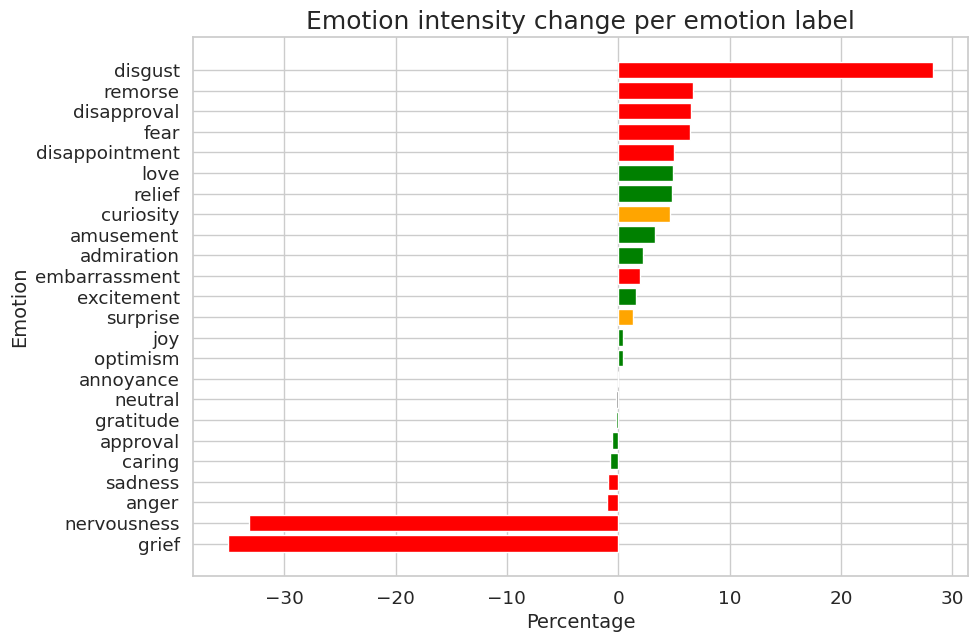

In [80]:
import math
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))

# Create a new list that only contains non-NaN values and their corresponding emotion categories
non_nan_changes = []
non_nan_emotions = []
for i in range(len(changes_per_emotion_category)):
    if not math.isnan(changes_per_emotion_category[i]):
        non_nan_changes.append(changes_per_emotion_category[i])
        non_nan_emotions.append(emotion_categories[i])

# Sort the data by emotion intensity
sorted_changes_per_emotion_category, sorted_emotion_categories = zip(*sorted(zip(non_nan_changes, non_nan_emotions)))

emotion_colors_dict = {"positive": "green", "negative": "red", "ambiguous": "orange", "neutral": "gray"}
emotion_colors = [emotion_colors_dict[emotion_label] for emotion_label in [emotion_dict[emotion] for emotion in sorted_emotion_categories]]

#ax.barh(sorted_emotion_categories, sorted_changes_per_emotion_category, color='b')
ax.barh(sorted_emotion_categories, sorted_changes_per_emotion_category, color=emotion_colors)
#ax.tick_params(axis='y', colors=[colors[key] for key in data.keys()])
#ax.barh(emotion_categories, changes_per_emotion_category, color='b')

# Set chart title and axis labels
ax.set_title('Emotion intensity change per emotion label', fontsize=18)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Emotion', fontsize=14)

# Show the chart
plt.show()

In [81]:
positive_indexes = [i for i in range(len(emotion_categories)) if emotion_dict[emotion_categories[i]]=="positive"]
positive_emotion_changes = [changes_per_emotion_category[i] for i in positive_indexes]

negative_indexes = [i for i in range(len(emotion_categories)) if emotion_dict[emotion_categories[i]]=="negative"]
negative_emotion_changes = [changes_per_emotion_category[i] for i in negative_indexes]

amb_indexes = [i for i in range(len(emotion_categories)) if emotion_dict[emotion_categories[i]]=="ambiguous"]
ambiguous_emotion_changes = [changes_per_emotion_category[i] for i in amb_indexes]

print(f"Positive emotion categories changed by +{int(np.nanmean(positive_emotion_changes))}%.")
print(f"Negative emotion categories increased by {int(np.nanmean(negative_emotion_changes))}%.")
print(f"Ambiguous emotion categories increased by {int(np.nanmean(ambiguous_emotion_changes))}%.")

Positive emotion categories changed by +1%.
Negative emotion categories increased by -1%.
Ambiguous emotion categories increased by 2%.


## What about the labels that changed?

### Overall emotion changes

In [82]:
changes_per_emotion = []
changes_per_emotion_normalized = []
for emotion in emotion_categories:
    value_counts_emotional = outputs_df.emotional_emotion.value_counts()
    value_counts_non_emotional = outputs_df.non_emotional_emotion.value_counts()
    
    if emotion in value_counts_emotional:
        count_emotional = value_counts_emotional[emotion]
    else:
        count_emotional = 0
            
    if emotion in value_counts_non_emotional:
        count_non_emotional = value_counts_non_emotional[emotion]
    else: 
        count_non_emotional = 0
        
    changes_per_emotion.append(count_emotional - count_non_emotional)
    if count_emotional + count_non_emotional != 0:
        changes_per_emotion_normalized.append(100*(count_emotional - count_non_emotional)/(count_emotional + count_non_emotional))

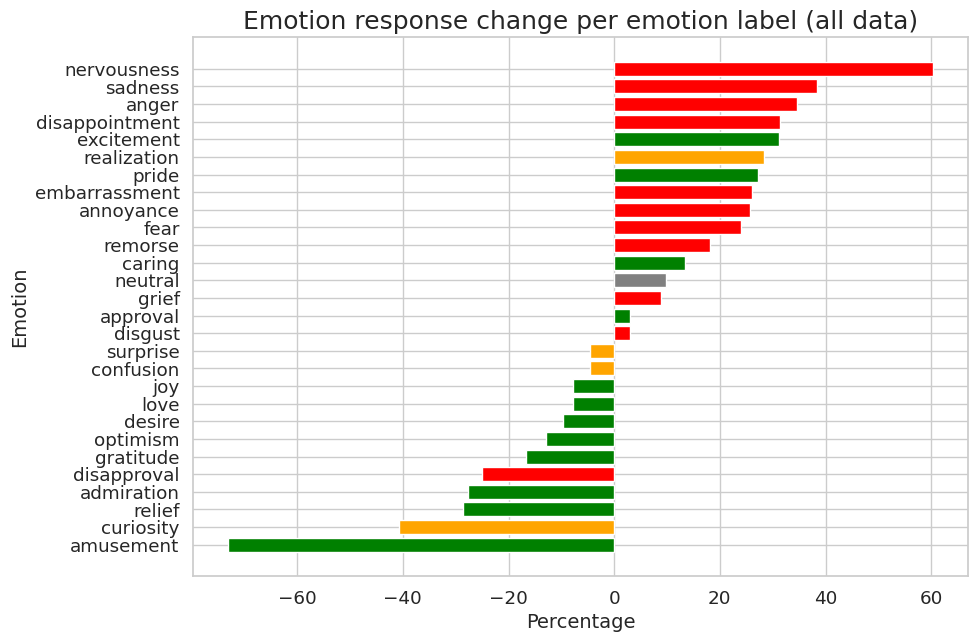

In [84]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))

# Create a new list that only contains non-NaN values and their corresponding emotion categories
non_nan_changes = []
non_nan_emotions = []
for i in range(len(changes_per_emotion_category)):
    if not math.isnan(changes_per_emotion_category[i]):
        non_nan_changes.append(changes_per_emotion_category[i])
        non_nan_emotions.append(emotion_categories[i])
        
# Sort the data by emotion intensity
sorted_changes_per_emotion_category, sorted_emotion_categories = zip(*sorted(zip(changes_per_emotion_normalized, emotion_categories)))

emotion_colors_dict = {"positive": "green", "negative": "red", "ambiguous": "orange", "neutral": "gray"}
emotion_colors = [emotion_colors_dict[emotion_label] for emotion_label in [emotion_dict[emotion] for emotion in sorted_emotion_categories]]

#ax.barh(sorted_emotion_categories, sorted_changes_per_emotion_category, color='b')
ax.barh(sorted_emotion_categories, sorted_changes_per_emotion_category, color=emotion_colors)
#ax.tick_params(axis='y', colors=[colors[key] for key in data.keys()])
#ax.barh(emotion_categories, changes_per_emotion_category, color='b')

# Set chart title and axis labels
ax.set_title('Emotion response change per emotion label (all data)', fontsize=18)
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Emotion', fontsize=14)

# Show the chart
plt.show()

### What user emotions changed the chatbot emotion?

In [85]:
emotion_to_color_dict = {emotion: emotion_colors_dict[emotion_dict[emotion]] for emotion in emotion_dict}

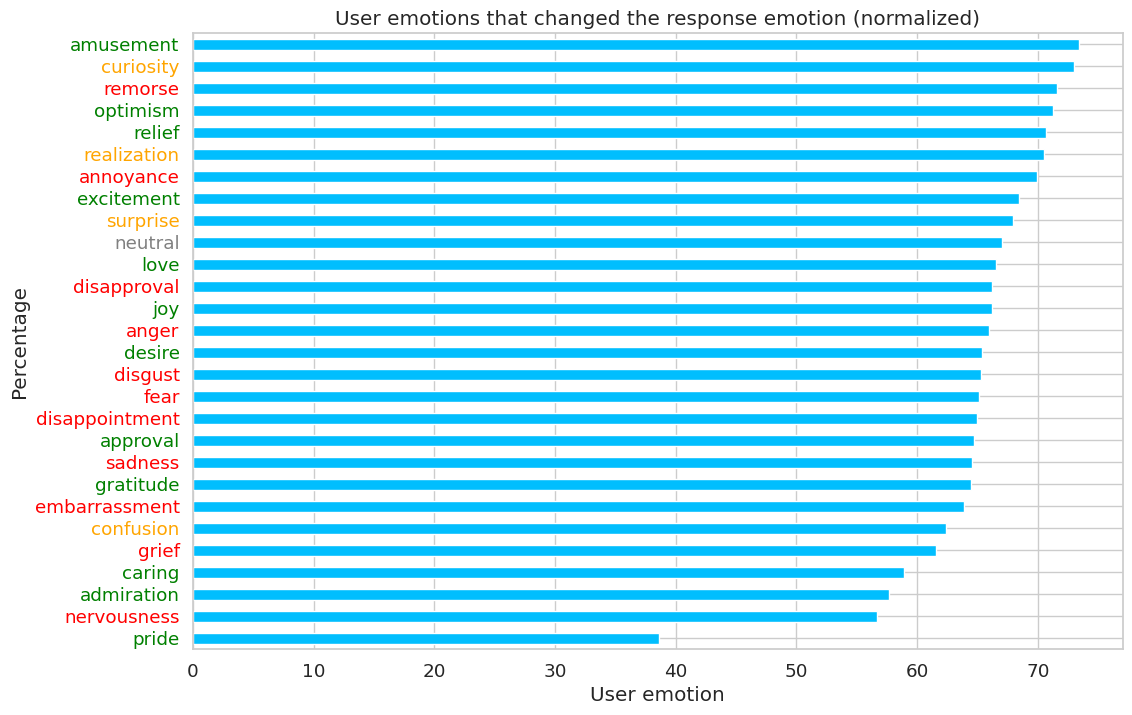

In [86]:
mask = chatept_output['no_emotion_chatgpt_response_emotion'].apply(lambda x: x[0]) != chatept_output['prompt2_chatgpt_response_emotion'].apply(lambda x: x[0])
value_counts = chatept_output[mask].utterance_minus_2_emotion.value_counts()
# Normalizing to the number of occurences of each emotion
for emotion in value_counts.index:
    value_counts.loc[emotion] = 100*value_counts.loc[emotion]/chatept_output.utterance_minus_2_emotion.value_counts().loc[emotion]

#value_counts/chatept_output.utterance_minus_2_emotion.value_counts()

# Plot the histogram
fig, ax = plt.subplots()
#value_counts.plot(kind='bar', ax=ax)
sorted_value_counts = value_counts.sort_values(ascending=True)
sorted_colors = [emotion_colors_dict[emotion_dict[emotion]] for emotion in sorted_value_counts.index]
#value_counts.plot(kind='bar', ax=ax)
sorted_value_counts.plot(kind='barh', ax=ax)#, color=emotion_colors)

for tick, color in zip(plt.gca().get_yticklabels(), sorted_colors):
    tick.set_color(color)
    
# Customize the plot
ax.set_xlabel('User emotion')
ax.set_ylabel('Percentage')
ax.set_title("User emotions that changed the response emotion (normalized)")

# Display the plot
plt.show()

### Which ChatGPT emotions were changed with the introduction of the user emotion?

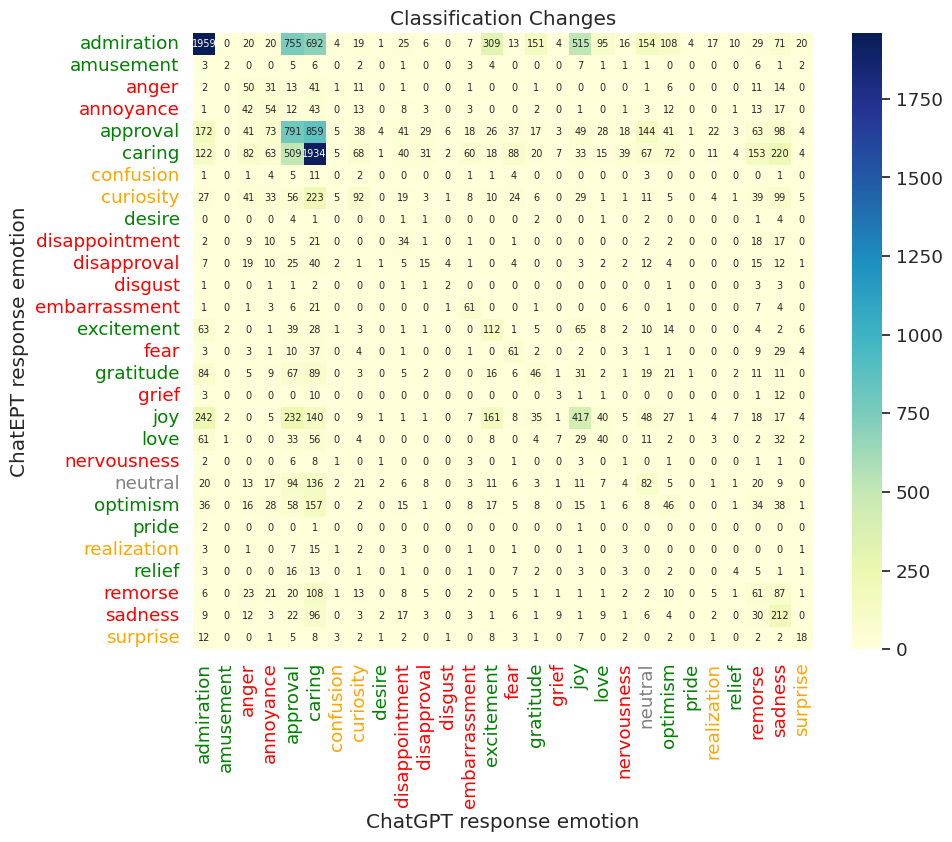

In [87]:
# Create two sample Series
s1 = outputs_df.non_emotional_emotion
s2 = outputs_df.emotional_emotion

# Create a crosstab of the two Series
crosstab = pd.crosstab(s1, s2)

# Create a heatmap of the crosstab
plt.figure(figsize=(10,8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.0f', annot_kws={'fontsize':7})

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in crosstab.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Get the xtick labels
xtick_labels = plt.gca().get_xticklabels()

# Set the color for each xtick label
xlabel_colors = [emotion_to_color_dict[emotion] for emotion in crosstab.columns.to_list()]
for i, label in enumerate(xtick_labels):
    label.set_color(xlabel_colors[i])


plt.xlabel('ChatGPT response emotion')
plt.ylabel('ChatEPT response emotion')
plt.title('Classification Changes')
plt.show()

<Figure size 800x600 with 0 Axes>

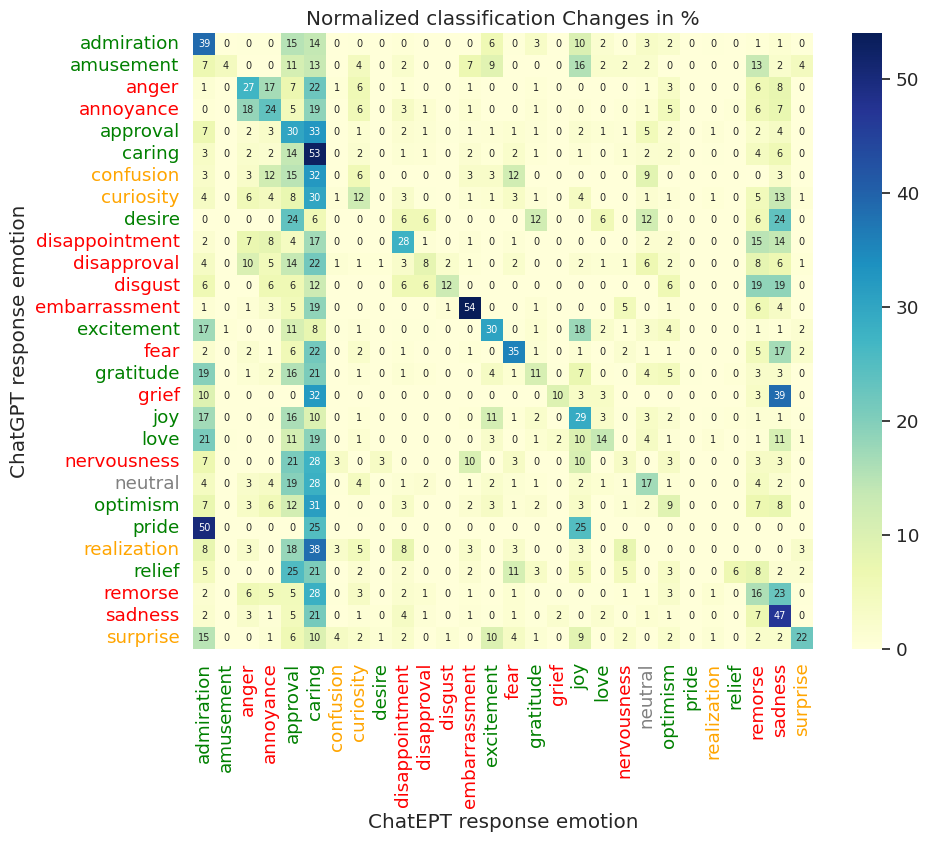

In [88]:
# Create two sample Series
s1 = outputs_df.non_emotional_emotion
s2 = outputs_df.emotional_emotion

# Create a crosstab of the two Series
crosstab = pd.crosstab(s1, s2)

plt.figure(figsize=(8,6))

# define a normalization function
def normalize_row(row):
    return row / row.sum()

# apply the normalization function to each row of the crosstab
crosstab_norm = 100*crosstab.apply(normalize_row, axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_norm, annot=True, cmap='YlGnBu', fmt='.0f', annot_kws={'fontsize':7})

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_norm.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Get the xtick labels
xtick_labels = plt.gca().get_xticklabels()

# Set the color for each xtick label
xlabel_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_norm.columns.to_list()]
for i, label in enumerate(xtick_labels):
    label.set_color(xlabel_colors[i])

plt.xlabel('ChatEPT response emotion')
plt.ylabel('ChatGPT response emotion')
plt.title('Normalized classification Changes in %')
plt.show()

### What emotion did ChatGPT choose per detected user emotion?

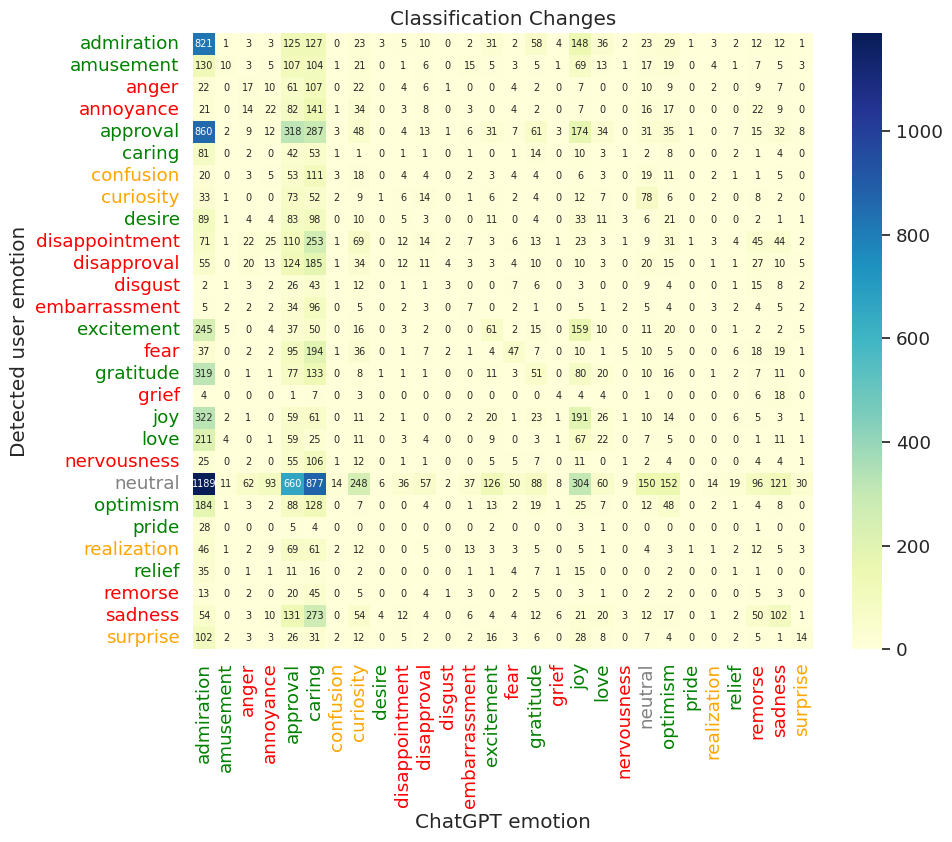

In [89]:
# Create two sample Series
s1 = chatept_output.utterance_minus_2_emotion
s2 = outputs_df.non_emotional_emotion

# Create a crosstab of the two Series
crosstab_non_emotional = pd.crosstab(s1, s2)

# Create a heatmap of the crosstab
plt.figure(figsize=(10,8))
sns.heatmap(crosstab_non_emotional, annot=True, cmap='YlGnBu', fmt='.0f', annot_kws={'fontsize':7})

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_non_emotional.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Get the xtick labels
xtick_labels = plt.gca().get_xticklabels()

# Set the color for each xtick label
xlabel_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_non_emotional.columns.to_list()]
for i, label in enumerate(xtick_labels):
    label.set_color(xlabel_colors[i])

plt.xlabel('ChatGPT emotion')
plt.ylabel('Detected user emotion')
plt.title('Classification Changes')
plt.show()

### What emotion did ChatEPT choose per detected user emotion?

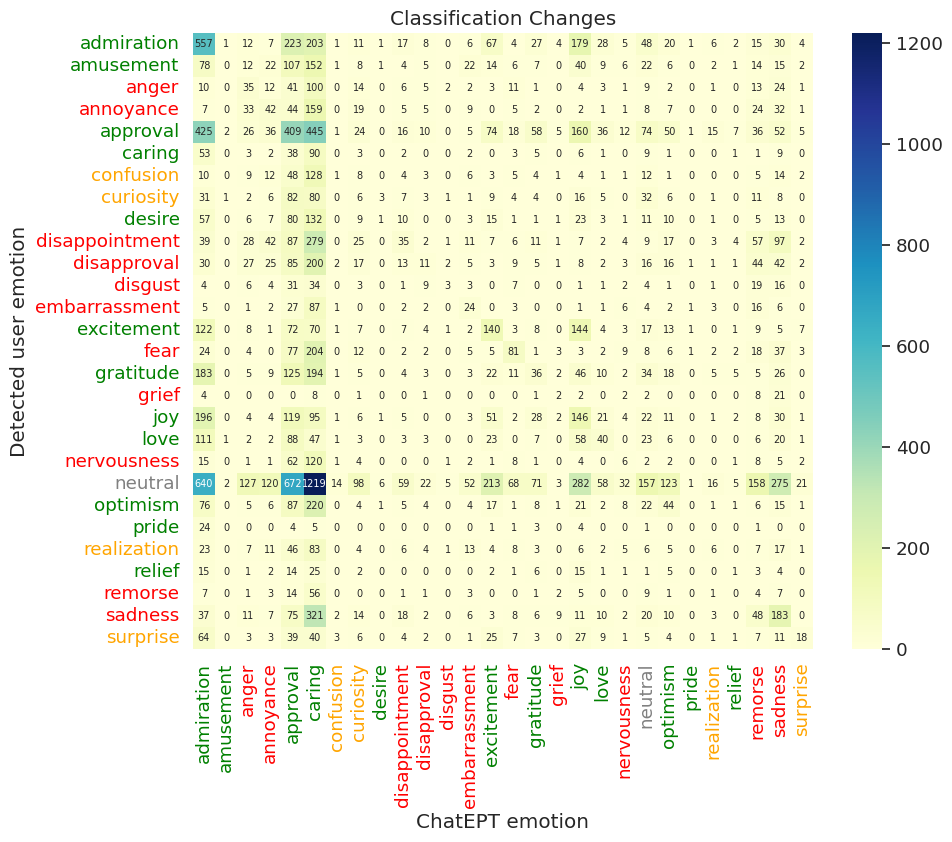

In [90]:
# Create two sample Series
s1 = chatept_output.utterance_minus_2_emotion
s2 = outputs_df.emotional_emotion

# Create a crosstab of the two Series
crosstab_emotional = pd.crosstab(s1, s2)

# Create a heatmap of the crosstab
plt.figure(figsize=(10,8))
sns.heatmap(crosstab_emotional, annot=True, cmap='YlGnBu', fmt='.0f', annot_kws={'fontsize':7})

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_emotional.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Get the xtick labels
xtick_labels = plt.gca().get_xticklabels()

# Set the color for each xtick label
xlabel_colors = [emotion_to_color_dict[emotion] for emotion in crosstab_emotional.columns.to_list()]
for i, label in enumerate(xtick_labels):
    label.set_color(xlabel_colors[i])

plt.xlabel('ChatEPT emotion')
plt.ylabel('Detected user emotion')
plt.title('Classification Changes')
plt.show()

### ChatGPT vs ChatEPT response emotion choices

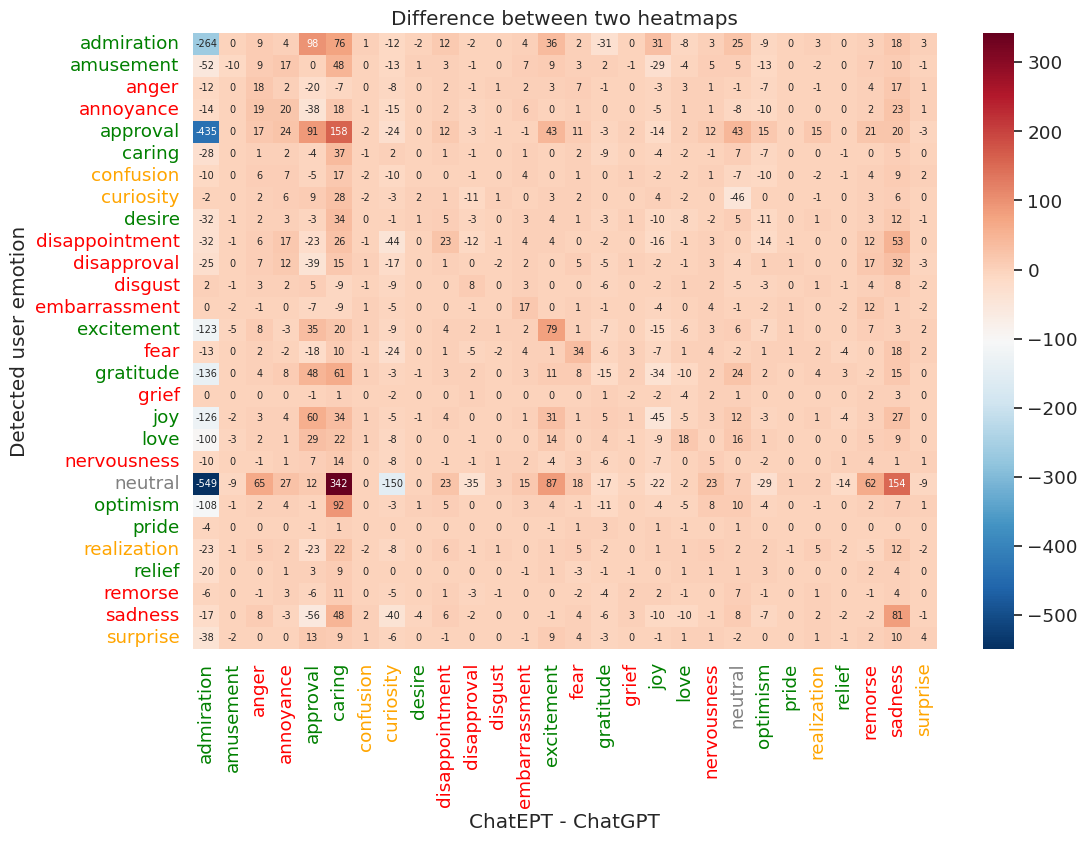

In [91]:
# Compute the difference between the two heatmaps
heatmap_diff = crosstab_emotional - crosstab_non_emotional

# Plot the difference heatmap
#plt.imshow(heatmap_diff, cmap='RdBu_r')
vmin = heatmap_diff.min().min()
vmax = heatmap_diff.max().max()
ticks = [vmax, (vmax + vmin) / 2, vmin]


sns.heatmap(heatmap_diff, annot=True, cmap='RdBu_r', fmt='.0f', annot_kws={'fontsize':7})

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in heatmap_diff.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Get the xtick labels
xtick_labels = plt.gca().get_xticklabels()

# Set the color for each xtick label
xlabel_colors = [emotion_to_color_dict[emotion] for emotion in heatmap_diff.columns.to_list()]
for i, label in enumerate(xtick_labels):
    label.set_color(xlabel_colors[i])

# Add a colorbar and title
#plt.colorbar()
plt.xlabel('ChatEPT - ChatGPT')
plt.ylabel('Detected user emotion')
plt.title('Difference between two heatmaps')

# Show the plot
plt.show()

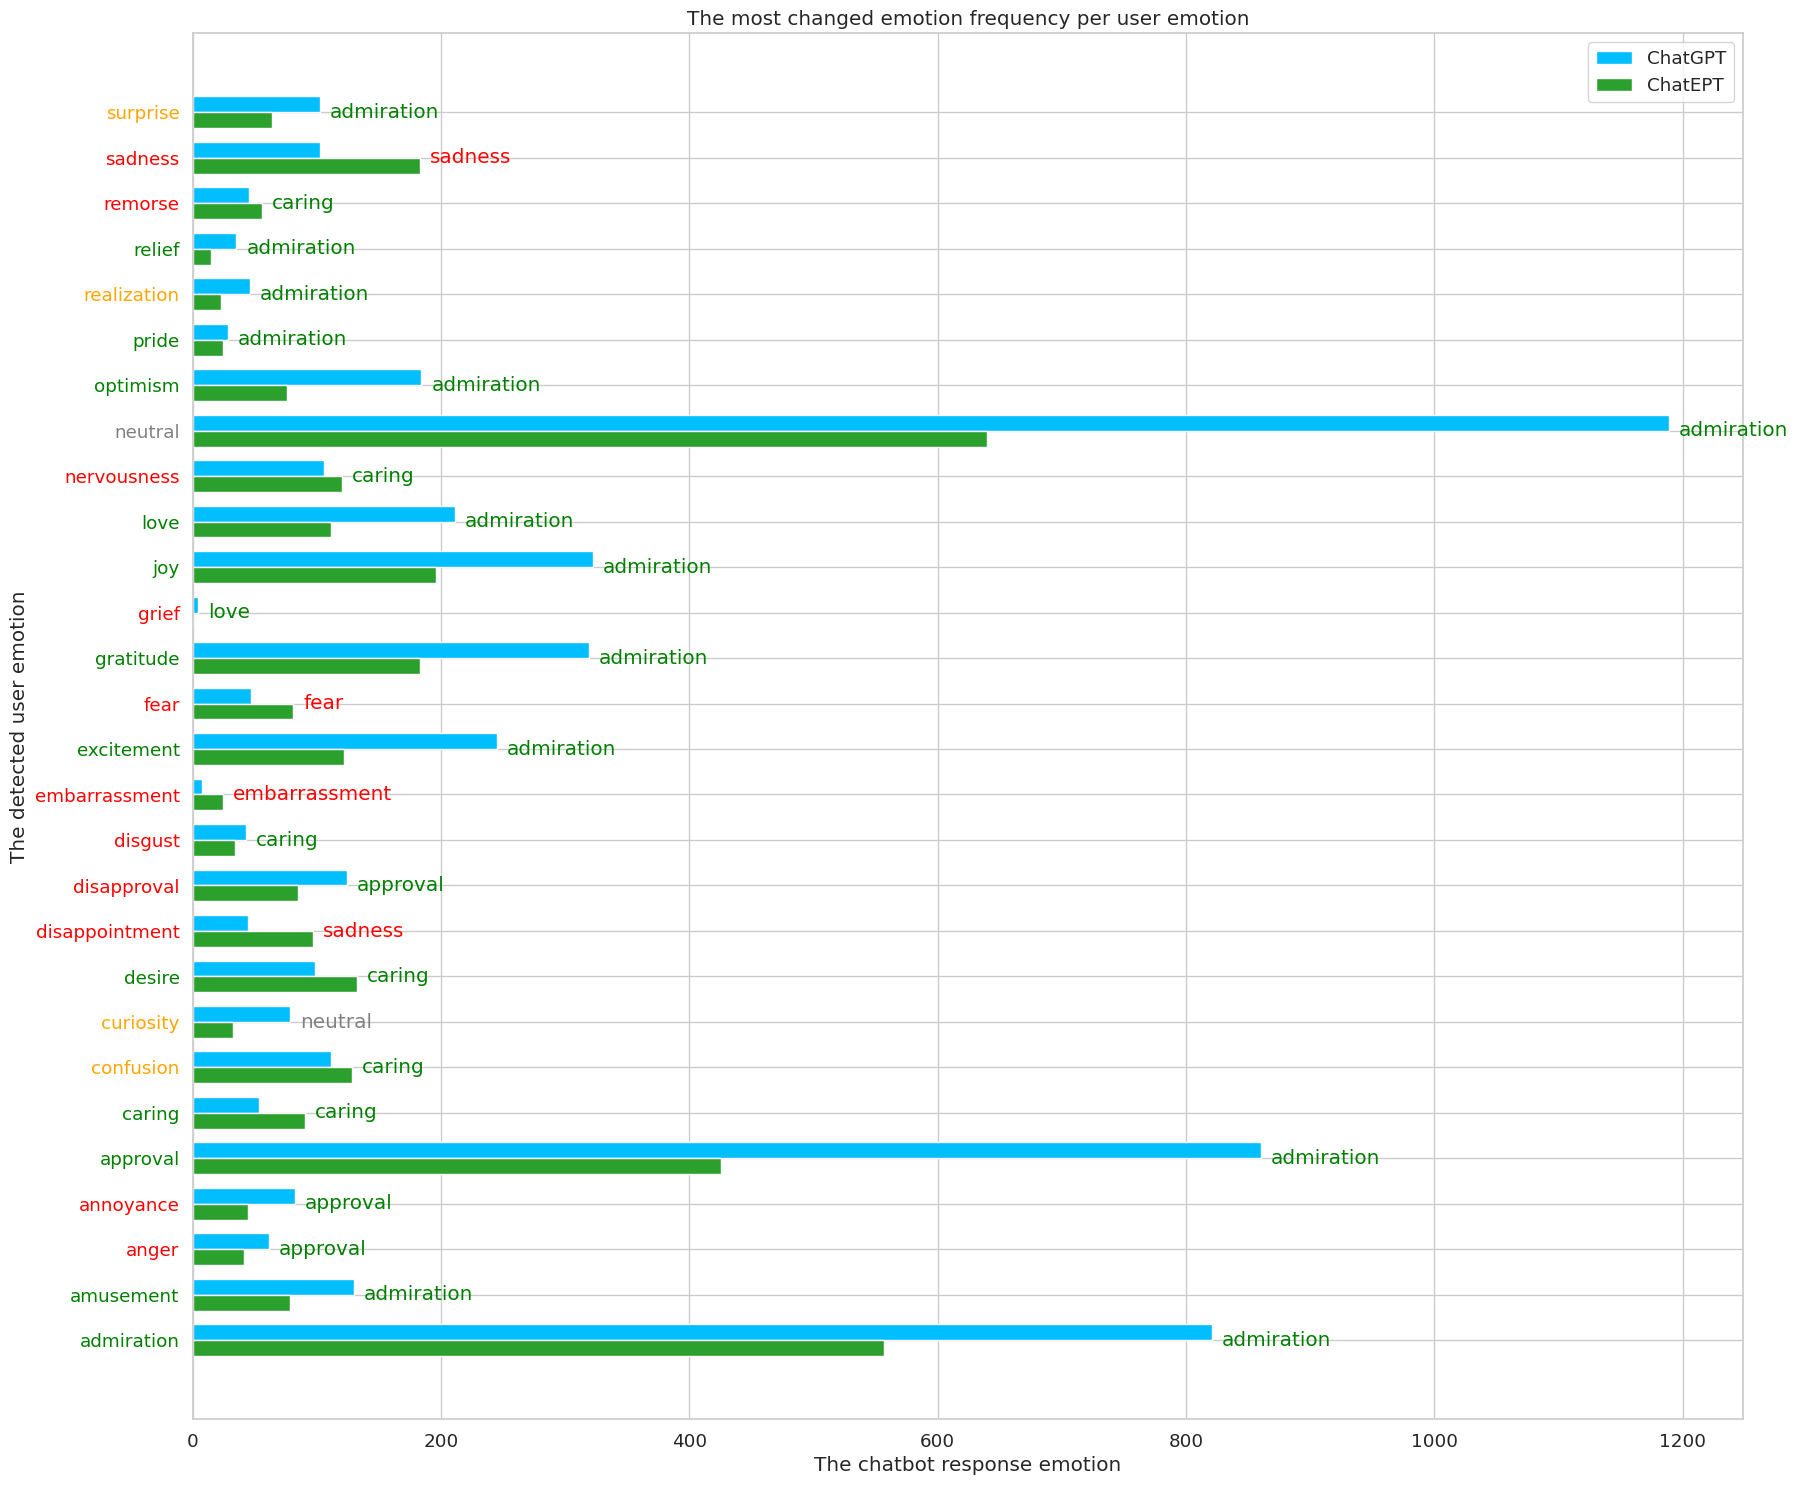

In [92]:
max_absolute_values = heatmap_diff.abs().max(axis=1)
max_column_names = heatmap_diff.abs().idxmax(axis=1)

biggest_emo_freq_diff = []
chatgpt_freq = []
chatept_freq = []
for i, user_emotion in enumerate(heatmap_diff.index.to_list()):
    chatgpt_freq.append(crosstab_non_emotional.loc[user_emotion, max_column_names.to_list()[i]])
    chatept_freq.append(crosstab_emotional.loc[user_emotion, max_column_names.to_list()[i]])
    biggest_emo_freq_diff.append(heatmap_diff.loc[user_emotion, max_column_names.to_list()[i]])

plt.figure(figsize=(20, 18))    
# Define the x-axis range
x_range = np.arange(len(heatmap_diff.index.to_list()))

# Define the width of the bars
bar_width = 0.35

# Plot the bars for chatgpt_freq
plt.barh(x_range + bar_width, chatgpt_freq, height=bar_width, label='ChatGPT')

# Plot the bars for chatept_freq
plt.barh(x_range, chatept_freq, height=bar_width, label='ChatEPT', color="#2ca02c")

# Set the x-axis labels
plt.yticks(x_range + bar_width / 2, heatmap_diff.index.to_list())

for i, (cg_freq, ce_freq) in enumerate(zip(chatgpt_freq, chatept_freq)):
    plt.text(max(cg_freq, ce_freq)+8 , i + bar_width / 2, f"{max_column_names.to_list()[i]}", color=emotion_to_color_dict[max_column_names.to_list()[i]], va="center")

# Get the ytick labels
ytick_labels = plt.gca().get_yticklabels()

# Set the color for each ytick label
label_colors = [emotion_to_color_dict[emotion] for emotion in heatmap_diff.index.to_list()]
for i, label in enumerate(ytick_labels):
    label.set_color(label_colors[i])
    
# Add a legend
plt.legend()

# Add a title
plt.title("The most changed emotion frequency per user emotion")
plt.xlabel("The chatbot response emotion")
plt.ylabel("The detected user emotion")
# Show the plot
plt.show()

In [93]:
utterance_2_support_per_emotion = []
for i in range(len(emotion_categories)):
    emotion_i = emotion_categories[i]
    utterance_2_emotion_i_df = chatept_output[chatept_output.utterance_minus_2_emotion == emotion_i]
    utterance_2_support_per_emotion.append(len(utterance_2_emotion_i_df))
support_dict = {k: v for k, v in zip(emotion_categories, utterance_2_support_per_emotion)}
adjusted_support_list = []
for emotion in crosstab_emotional.index.to_list():
    adjusted_support_list.append(support_dict[emotion])

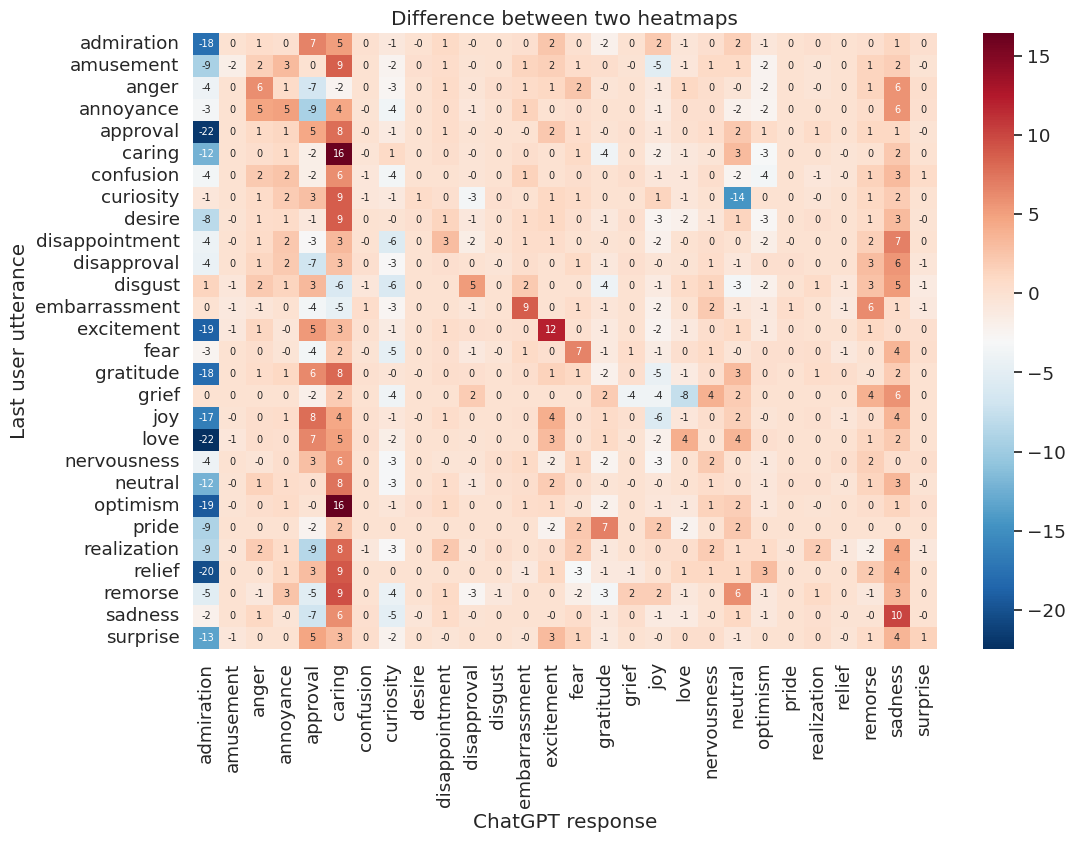

In [ ]:
# Compute the difference between the two heatmaps
heatmap_diff = crosstab_emotional - crosstab_non_emotional
normalized_heatmap_diff = 100*heatmap_diff.div(adjusted_support_list, axis=0)

# Plot the difference heatmap
#plt.imshow(heatmap_diff, cmap='RdBu_r')
#vmin = heatmap_diff.min().min()
#vmax = heatmap_diff.max().max()
#ticks = [vmax, (vmax + vmin) / 2, vmin]


sns.heatmap(normalized_heatmap_diff, annot=True, cmap='RdBu_r', fmt='.0f', annot_kws={'fontsize':7})
# Add a colorbar and title
#plt.colorbar()
plt.xlabel('ChatGPT response')
plt.ylabel('Last user utterance')
plt.title('Difference between two heatmaps')

# Show the plot
plt.show()

## How did emotions move? A 3D heatmap 

In [58]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

s0 = outputs_df.utterance_minus_2_emotion
s1 = outputs_df.non_emotional_emotion
s2 = outputs_df.emotional_emotion

# Create crosstabs for chatbot1 and chatbot2 emotions
crosstab1 = pd.crosstab(index=s0, columns=s1)
crosstab2 = pd.crosstab(index=s0, columns=s2)

# Create a 3D array from the crosstabs
crosstab3d = np.zeros((28, 27, 27))
for i, user_emotion in enumerate(crosstab1.index):
    for j, chatbot1_emotion in enumerate(crosstab1.columns):
        for k, chatbot2_emotion in enumerate(crosstab2.columns):
            value1 = crosstab1.loc[user_emotion, chatbot1_emotion]
            value2 = crosstab2.loc[user_emotion, chatbot2_emotion]
            crosstab3d[i, j, k] = (value1 + value2) / 2

# Create a 3D heatmap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.meshgrid(range(28), range(27), range(27))
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=crosstab3d.flatten(), cmap='coolwarm', marker='o')
ax.set_xticklabels([''] + crosstab1.columns.tolist())
ax.set_yticklabels([''] + crosstab1.index.tolist())
ax.set_zticklabels([''] + crosstab2.columns.tolist())
ax.set_xlabel('Chatbot1 Emotion')
ax.set_ylabel('User Emotion')
ax.set_zlabel('Chatbot2 Emotion')

ax.view_init(elev=30, azim=70)

plt.show()


IndexError: index 27 is out of bounds for axis 2 with size 27

In [ ]:
data = chatept_output[["conv_id", "utterance_minus_2_emotion", "no_emotion_chatgpt_response_emotion", "prompt2_chatgpt_response_emotion"]]
data[['non_emotional_emotion', 'non_emotional_conf']] = data['no_emotion_chatgpt_response_emotion'].apply(lambda x: pd.Series(x))
data[['emotional_emotion', 'emotional_conf']] = data['prompt2_chatgpt_response_emotion'].apply(lambda x: pd.Series(x))
data.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sample data
#data = {'user_emotion': ['happy', 'happy', 'angry', 'happy', 'neutral', 'neutral', 'sad', 'neutral', 'angry', 'happy'],
#        'chatbot1_emotion': ['happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'sad', 'happy', 'happy', 'happy'],
#        'chatbot2_emotion': ['happy', 'happy', 'angry', 'happy', 'happy', 'neutral', 'sad', 'neutral', 'angry', 'happy']}

df = pd.DataFrame(data[["utterance_minus_2_emotion", "emotional_emotion", "non_emotional_emotion"]])
df = df.rename(columns={"utterance_minus_2_emotion": "user_emotion", 'emotional_emotion': 'chatbot1_emotion', 'non_emotional_emotion': 'chatbot2_emotion'})


# get counts for each response emotion per user utterance per chatbot
counts = df.melt(id_vars=['user_emotion'], value_vars=['chatbot1_emotion', 'chatbot2_emotion'], var_name='chatbot', value_name='emotion') \
    .groupby(['user_emotion', 'chatbot', 'emotion']).size().reset_index(name='count')

# pivot the counts to get the data in the right format for plotting
chatbot1_counts = counts[counts['chatbot'] == 'chatbot1_emotion'].pivot(index='user_emotion', columns='emotion', values='count')
chatbot2_counts = counts[counts['chatbot'] == 'chatbot2_emotion'].pivot(index='user_emotion', columns='emotion', values='count')

# set up the plot
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
opacity = 0.8

# plot the bars for chatbot1
x = np.arange(len(chatbot1_counts.index))
chatbot1_bars = ax.bar(x, chatbot1_counts.sum(axis=1), width=bar_width, alpha=opacity, color='b', label='Chatbot 1')

# plot the bars for chatbot2
chatbot2_bars = ax.bar(x + bar_width, chatbot2_counts.sum(axis=1), width=bar_width, alpha=opacity, color='g', label='Chatbot 2')

# add labels, titles, and legend
ax.set_xlabel('User Emotion')
ax.set_ylabel('Number of Conversations')
ax.set_title('Chatbot Response Emotions by User Emotion')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(chatbot1_counts.index, rotation=90)
ax.legend()

# add the stacked bars for chatbot1
bottom = np.zeros(len(chatbot1_counts.index))
for emotion in chatbot1_counts.columns:
    ax.bar(x, chatbot1_counts[emotion], bottom=bottom, width=bar_width, alpha=opacity)
    bottom += chatbot1_counts[emotion]

# add the stacked bars for chatbot2
bottom = np.zeros(len(chatbot2_counts.index))
for emotion in chatbot2_counts.columns:
    ax.bar(x + bar_width, chatbot2_counts[emotion], bottom=bottom, width=bar_width, alpha=opacity)
    bottom += chatbot2_counts[emotion]

plt.show()


In [ ]:
# sample data
data = {'user_emotion': ['happy', 'happy', 'angry', 'happy', 'neutral', 'neutral', 'sad', 'neutral', 'angry', 'happy'],
        'chatbot1_emotion': ['happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'sad', 'happy', 'happy', 'happy'],
        'chatbot2_emotion': ['happy', 'happy', 'angry', 'happy', 'happy', 'neutral', 'sad', 'neutral', 'angry', 'happy']}

df = pd.DataFrame(data)
#df = pd.DataFrame(data[["utterance_minus_2_emotion", "emotional_emotion", "non_emotional_emotion"]])
#df = df.rename(columns={"utterance_minus_2_emotion": "user_emotion", 'emotional_emotion': 'chatbot1_emotion', 'non_emotional_emotion': 'chatbot2_emotion'})


# get counts for each response emotion per user utterance per chatbot
counts = df.melt(id_vars=['user_emotion'], value_vars=['chatbot1_emotion', 'chatbot2_emotion'], var_name='chatbot', value_name='emotion') \
    .groupby(['user_emotion', 'chatbot', 'emotion']).size().reset_index(name='count')

# get percentages for each response emotion per user utterance per chatbot
total_counts = counts.groupby(['user_emotion', 'chatbot']).sum().reset_index().rename(columns={'count': 'total_count'})
df_perc = pd.merge(counts, total_counts, on=['user_emotion', 'chatbot'])
df_perc['percentage'] = df_perc['count'] / df_perc['total_count'] * 100

# pivot the percentages to get the data in the right format for plotting
chatbot1_perc = df_perc[df_perc['chatbot'] == 'chatbot1_emotion'].pivot(index='user_emotion', columns='emotion', values='percentage').fillna(0)
chatbot2_perc = df_perc[df_perc['chatbot'] == 'chatbot2_emotion'].pivot(index='user_emotion', columns='emotion', values='percentage').fillna(0)

# set up the plot
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
opacity = 0.8

# plot the bars for chatbot1
x = np.arange(len(chatbot1_perc.index))
chatbot1_bars = ax.bar(x, chatbot1_perc.sum(axis=1), width=bar_width, alpha=opacity, color='b', label='Chatbot 1')

# plot the bars for chatbot2
chatbot2_bars = ax.bar(x + bar_width, chatbot2_perc.sum(axis=1), width=bar_width, alpha=opacity, color='g', label='Chatbot 2')

# add labels, titles, and legend
ax.set_xlabel('User Emotion')
ax.set_ylabel('Percentage of Conversations')
ax.set_title('Chatbot Response Emotions by User Emotion')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(chatbot1_perc.index, rotation=90)
ax.legend()

# add the stacked bars for chatbot1
bottom = np.zeros(len(chatbot1_perc.index))
for emotion in chatbot1_perc.columns:
    ax.bar(x, chatbot1_perc[emotion], bottom=bottom, width=bar_width, alpha=opacity)
    bottom += chatbot1_perc[emotion]

# add the stacked bars for chatbot2
bottom = np.zeros(len(chatbot2_perc.index))
for emotion in chatbot2_perc.columns:
    ax.bar(x + bar_width, chatbot2_perc[emotion], bottom=bottom, width=bar_width, alpha=opacity)
    bottom += chatbot2_perc[emotion]

plt.show()


In [ ]:
# sample data
"""data = {'user_emotion': ['happy', 'happy', 'angry', 'happy', 'neutral', 'neutral', 'sad', 'neutral', 'angry', 'happy'],
        'chatbot1_emotion': ['happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'sad', 'happy', 'happy', 'happy'],
        'chatbot2_emotion': ['happy', 'happy', 'angry', 'happy', 'happy', 'neutral', 'sad', 'neutral', 'angry', 'happy']}

df = pd.DataFrame(data)"""
df = pd.DataFrame(data[["utterance_minus_2_emotion", "emotional_emotion", "non_emotional_emotion"]])
df = df.rename(columns={"utterance_minus_2_emotion": "user_emotion", 'emotional_emotion': 'chatbot1_emotion', 'non_emotional_emotion': 'chatbot2_emotion'})

# create a dictionary of color mappings
colors = {
    'admiration': 'red',
    'amusement': 'green',
    'anger': 'blue',
    'annoyance': 'yellow',
    'approval': 'purple',
    'caring': 'orange',
    'confusion': 'gray',
    'curiosity': 'brown',
    'desire': 'pink',
    'disappointment': 'teal',
    'disapproval': 'navy',
    'disgust': 'olive',
    'embarrassment': 'lavender',
    'excitement': 'magenta',
    'fear': 'cyan',
    'gratitude': 'maroon',
    'grief': 'gold',
    'joy': 'coral',
    'love': 'lime',
    'nervousness': 'tan',
    'optimism': 'peru',
    'pride': 'indigo',
    'realization': 'firebrick',
    'relief': 'sienna',
    'remorse': 'deeppink',
    'sadness': 'limegreen',
    'surprise': 'chocolate',
    'neutral': 'gray'
}

# get counts for each response emotion per user utterance per chatbot
counts = df.melt(id_vars=['user_emotion'], value_vars=['chatbot1_emotion', 'chatbot2_emotion'], var_name='chatbot', value_name='emotion') \
    .groupby(['user_emotion', 'chatbot', 'emotion']).size().reset_index(name='count')

# get percentages for each response emotion per user utterance per chatbot
total_counts = counts.groupby(['user_emotion', 'chatbot']).sum().reset_index().rename(columns={'count': 'total_count'})
df_perc = pd.merge(counts, total_counts, on=['user_emotion', 'chatbot'])
df_perc['percentage'] = df_perc['count'] / df_perc['total_count'] * 100

# pivot the percentages to get the data in the right format for plotting
chatbot1_perc = df_perc[df_perc['chatbot'] == 'chatbot1_emotion'].pivot(index='user_emotion', columns='emotion', values='percentage').fillna(0)
chatbot2_perc = df_perc[df_perc['chatbot'] == 'chatbot2_emotion'].pivot(index='user_emotion', columns='emotion', values='percentage').fillna(0)

# set up the plot
fig, ax = plt.subplots(figsize=(20, 14))
bar_width = 0.35
opacity = 0.8

# define the default color
default_color = 'gray'

# plot the bars for chatbot1
x = np.arange(len(chatbot1_perc.index))
chatbot1_bars = ax.bar(x, chatbot1_perc.sum(axis=1), width=bar_width, alpha=opacity, color=colors.get('happy', default_color), label='Chatbot 1')

# plot the bars for chatbot2
chatbot2_bars = ax.bar(x + bar_width, chatbot2_perc.sum(axis=1), width=bar_width, alpha=opacity, color=colors.get('happy', default_color), label='Chatbot 2')

# add labels, titles, and legend
ax.set_xlabel('User Emotion')
ax.set_ylabel('Percentage of Conversations')
ax.set_title('Chatbot Response Emotions by User Emotion')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(chatbot1_perc.index, rotation=90)
ax.legend()

# add the stacked bars for chatbot1
bottom = np.zeros(len(chatbot1_perc.index))
for emotion in chatbot1_perc.columns:
    ax.bar(x, chatbot1_perc[emotion], bottom=bottom, width=bar_width, alpha=opacity, color=colors.get(emotion, default_color))
    bottom += chatbot1_perc[emotion]

# add the stacked bars for chatbot2
bottom = np.zeros(len(chatbot2_perc.index))
for emotion in chatbot2_perc.columns:
    ax.bar(x + bar_width, chatbot2_perc[emotion], bottom=bottom, width=bar_width, alpha=opacity, color=colors.get(emotion, default_color))
    bottom += chatbot2_perc[emotion]

# create a list of legend handles and labels
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[key]) for key in colors]
legend_labels = [key for key in colors]

# show the legend
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.0, 0.7))
plt.show()



# Now we exclude conversations where ChatGPT is neutral

In [32]:
#chatept_output_no_neutral = chatept_output[chatept_output.no_emotion_chatgpt_response_emotion.apply(lambda x: x[0]) == "neutral"]
chatept_output_no_neutral = chatept_output[chatept_output.no_emotion_chatgpt_response_emotion.apply(lambda x: x[1]) < 50]
print(f"Out of the {len(chatept_output)} total conversations, there are {len(chatept_output_no_neutral)} where the ChatGPT is neutral and {len(chatept_output) - len(chatept_output_no_neutral)} in which ChatGPT responds with emotions")
chatept_output_no_neutral.head()

Out of the 17780 total conversations, there are 1533 where the ChatGPT is neutral and 16247 in which ChatGPT responds with emotions


,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_emotional_response,no_emotion_chatgpt_response_emotion,emotional_chatgpt_response_emotion
28,28,hit:1002_conv:2004,surprised,[My husband hasn't planned a date for the two ...,approval,26.16,"Absolutely, it's important to make time for ea...","(approval, 26.16, Yes, life can be unpredictab...","(approval, 37.12)","(approval, 49.4)"
49,49,hit:10070_conv:20140,furious,[Oh boy I am livid! I just got this new couch ...,admiration,68.82,I'm sorry to hear that. Consider covering your...,"(admiration, 68.82, I understand how frustrati...","(remorse, 45.16)","(caring, 94.65)"
52,52,hit:10075_conv:20150,hopeful,[It's been a rough day! My water heater is bus...,optimism,97.90,That's great news! I hope everything works out...,"(optimism, 97.9, That's great! Hope your weeke...","(joy, 34.24)","(admiration, 85.03)"
68,68,hit:10093_conv:20187,prepared,[I just dyed my hair for the first time by mys...,admiration,68.34,That's a good tip! It's always helpful to watc...,"(admiration, 68.34, That's a great tip! I'm gl...","(gratitude, 49.74)","(admiration, 87.73)"
72,72,hit:1009_conv:2018,ashamed,[My best friend for years and I got into a fig...,disgust,55.00,It's understandable that you're feeling awful ...,"(disgust, 55.0, I'm sorry to hear that. Have y...","(caring, 48.25)","(gratitude, 73.77)"


In [28]:
chatept_output.no_emotion_chatgpt_response_emotion.apply(lambda x: x[0]).value_counts()

admiration        4955
caring            3748
approval          2640
joy               1441
curiosity          750
optimism           488
neutral            473
sadness            434
remorse            419
gratitude          405
excitement         366
love               321
annoyance          223
anger              203
fear               178
disapproval        175
disappointment     119
embarrassment      113
relief              87
surprise            62
realization         33
amusement           32
confusion           31
grief               28
nervousness         27
desire              15
disgust             14
Name: no_emotion_chatgpt_response_emotion, dtype: int64

# Now we exclude conversations with neutral user

In [21]:
chatept_output_no_neutral = chatept_output[chatept_output.utterance_minus_2_emotion != "neutral"]
print(f"Out of the {len(chatept_output)} total conversations, there are {len(chatept_output_no_neutral)} where the user is neutral and {len(chatept_output) - len(chatept_output_no_neutral)} in which the user is feeling emotions")
chatept_output_no_neutral.head()

Out of the 17780 total conversations, there are 13261 where the user is neutral and 4519 in which the user is feeling emotions


,index,conv_id,context,utterance,utterance_minus_2_emotion,utterance_minus_2_emotion_conf,chatgpt_response_no_emotion,chatgpt_emotional_response,no_emotion_chatgpt_response_emotion,emotional_chatgpt_response_emotion
1,1,hit:10000_conv:20000,surprised,"[My girlfriend got me a pet toad today!, Do yo...",joy,98.35,That's great to hear! Toads can make wonderful...,"(joy, 98.35, That's great to hear! Toads can m...","(admiration, 90.69)","(admiration, 85.92)"
3,3,hit:10001_conv:20002,lonely,[I went to the skating rink all by myself toda...,disappointment,31.49,I'm sorry to hear that. It's tough to feel lef...,"(disappointment, 31.49, I'm sorry to hear that...","(remorse, 82.51)","(optimism, 70.82)"
4,4,hit:10002_conv:20004,ashamed,[I was walking on the road. I saw a beggar and...,embarrassment,99.49,It's never too late to help someone in need. N...,"(embarrassment, 99.49, That's completely under...","(caring, 94.53)","(approval, 57.74)"
5,5,hit:10002_conv:20005,guilty,[I ate my co-worker's cake_comma_ which was in...,realization,67.58,"It's understandable that you were hungry, but ...","(realization, 67.58, You should apologize and ...","(approval, 96.22)","(approval, 93.43)"
7,7,hit:10004_conv:20008,surprised,"[My little cousin gifted me for my birthday, V...",approval,46.41,That's so thoughtful and hardworking of him. I...,"(approval, 46.41, That's wonderful to hear! It...","(admiration, 99.62)","(joy, 95.16)"
